
Training Confusion Matrix:
  [[24136  3288]
 [  809  2658]]

Testing Confusion Matrix:
  [[7765 1359]
 [ 504  669]]

Training Accuracy Score:  0.8673723738305655

Testing Accuracy Score:  0.8190735165582208

Training Precision:  0.44702320887991925

Testing Precision:  0.32988165680473375

Training Recall:  0.7666570522065186

Testing Recall:  0.5703324808184144

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92     27424
           1       0.45      0.77      0.56      3467

   micro avg       0.87      0.87      0.87     30891
   macro avg       0.71      0.82      0.74     30891
weighted avg       0.91      0.87      0.88     30891


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      9124
           1       0.33      0.57      0.42      1173

   micro avg       0.82      0.82      0.82     10297
   macro avg       0.63   

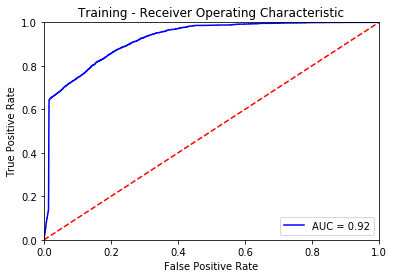

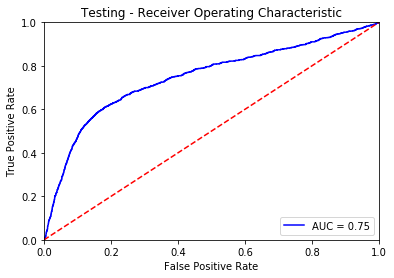

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import pickle

from src.evaluate import evaluate

df_train = pd.read_csv('./data/final/final_normalized_train.csv')
df_test = pd.read_csv('./data/final/final_normalized_test.csv')

df_train_class = pd.DataFrame(df_train['y'])
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

svm_model_final = SVC(C = 1.5, gamma = 0.05, kernel = 'rbf', class_weight='balanced', probability=True)

svm_model_final.fit(df_train_features, df_train_class.values.ravel())

predicted_train = svm_model_final.predict(df_train_features)
predicted_test = svm_model_final.predict(df_test_features)

predicted_prob_train = np.array([])
predicted_prob_test = np.array([])

predicted_prob_train = svm_model_final.predict_proba(df_train_features)
predicted_prob_test  = svm_model_final.predict_proba(df_test_features)

evaluate(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')

with open('./models/svm/final_svm_normalized_model.sav', 'wb') as f:
    pickle.dump(svm_model_final, f)


Training Confusion Matrix:
  [[23333  4091]
 [ 1177  2290]]

Testing Confusion Matrix:
  [[7704 1420]
 [ 459  714]]

Training Accuracy Score:  0.8294648926871905

Testing Accuracy Score:  0.8175196659221132

Training Precision:  0.35887791882150133

Testing Precision:  0.3345829428303655

Training Recall:  0.6605134121719065

Testing Recall:  0.6086956521739131

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     27424
           1       0.36      0.66      0.47      3467

   micro avg       0.83      0.83      0.83     30891
   macro avg       0.66      0.76      0.68     30891
weighted avg       0.89      0.83      0.85     30891


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      9124
           1       0.33      0.61      0.43      1173

   micro avg       0.82      0.82      0.82     10297
   macro avg       0.64    

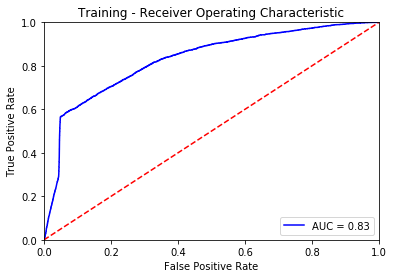

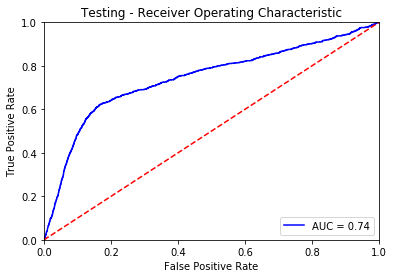

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import pickle
from sklearn.decomposition import PCA

from src.evaluate import evaluate

df_train = pd.read_csv('./data/final/final_normalized_train.csv')
df_test = pd.read_csv('./data/final/final_normalized_test.csv')

df_train_class = pd.DataFrame(df_train['y'])
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

pca_model = PCA(n_components=5)
pca_model.fit(df_train_features)
df_train_features = pd.DataFrame(pca_model.transform(df_train_features))
df_test_features = pd.DataFrame(pca_model.transform(df_test_features))

svm_model_final = SVC(C = 1.5, gamma = 0.05, kernel = 'rbf', class_weight='balanced', probability=True)

svm_model_final.fit(df_train_features, df_train_class.values.ravel())

predicted_train = svm_model_final.predict(df_train_features)
predicted_test = svm_model_final.predict(df_test_features)

predicted_prob_train = np.array([])
predicted_prob_test = np.array([])

predicted_prob_train = svm_model_final.predict_proba(df_train_features)
predicted_prob_test  = svm_model_final.predict_proba(df_test_features)

evaluate(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')

with open('./models/svm/final_svm_normalized_model_pca.sav', 'wb') as f:
    pickle.dump(svm_model_final, f)